Seq2Seq
----------------------
Before starting, some explanation is needed about RNN's and LSTM 

RNN
-------------------------------

Recurrent Neural Networks are models that work in a loop system in order to create the needed product with carrying the knowledge of the previous equation.
They can be used in multiple fields such as speech recognition,language modeling, translation, image captioning and so on

<img src="RNN-unrolled.png">

As with many other networks, RNN has its limitations. It can, in theory, work on any kind of data but it has been observed that it will have difficulties
when using bigger data. 
<img src="RNN-longtermdependencies.png">
While it works perfectly well when the data is relatively small or the wanted sample size is not that far away from the present data
that is been looked for, its simplistic layer will make it harder and harder to remember knowledge from far away.
<img src="LSTM3-SimpleRNN.png">

This is where LSTM's come in.


LSTM
----------------

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. LSTMs are explicitly designed to avoid the long-term dependency problem.
<img src="LSTM3-chain.png">



The General Procedure  of LSTM
-----------------------------------------

Cell State: Carries what the model needs to remember. This, alongside hidden state h(which is a production of cell state), allows the model to remember distant memory.
<img src="LSTM3-C-line.png">

Forget Gate Layer: Decides that if the previous state is needed to be remembered or not.
<img src="LSTM3-focus-f.png">

Input Gate Layer: Decides what values will be updated.
<img src="LSTM3-focus-i.png">

By the end, The cell state will either be updated or won't be touched.
<img src="LSTM3-focus-C.png">

Finally, the model will decide which parts it will produce as outputs.
<img src="LSTM3-focus-o.png">

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
summary = pd.read_csv('news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [ ]:
pre1 =  raw.iloc[:,0:2].copy()
print(pre1)

                                               headlines                                               text
0      upGrad learner switches to career in ML & Al w...  Saurav Kant, an alumnus of upGrad and IIIT-B's...
1      Delhi techie wins free food from Swiggy for on...  Kunal Shah's credit card bill payment platform...
2      New Zealand end Rohit Sharma-led India's 12-ma...  New Zealand defeated India by 8 wickets in the...
3      Aegon life iTerm insurance plan helps customer...  With Aegon Life iTerm Insurance plan, customer...
4      Have known Hirani for yrs, what if MeToo claim...  Speaking about the sexual harassment allegatio...
...                                                  ...                                                ...
98396  CRPF jawan axed to death by Maoists in Chhatti...  A CRPF jawan was on Tuesday axed to death with...
98397  First song from Sonakshi Sinha's 'Noor' titled...  'Uff Yeh', the first song from the Sonakshi Si...
98398         'The Matrix' f

In [ ]:
pre2 = summary.iloc[:,0:6].copy()
print(pre2)

                  author  ...                                              ctext
0           Chhavi Tyagi  ...  The Daman and Diu administration on Wednesday ...
1            Daisy Mowke  ...  From her special numbers to TV?appearances, Bo...
2         Arshiya Chopra  ...  The Indira Gandhi Institute of Medical Science...
3          Sumedha Sehra  ...  Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4     Aarushi Maheshwari  ...  Hotels in Mumbai and other Indian cities are t...
...                  ...  ...                                                ...
4509      Mansha Mahajan  ...  Mumbai, Feb 23 (PTI) Fruit juice concentrate m...
4510      Dishant Sharma  ...  Former cricketer Sachin Tendulkar was spotted ...
4511       Tanya Dhingra  ...  Aamir Khan, whose last film Dangal told the st...
4512      Pragya Swastik  ...  Maharahstra Power Minister Chandrashekhar Bawa...
4513        Chhavi Tyagi  ...  More than half of the languages spoken by Indi...

[4514 rows x 6 columns]


In [ ]:
pre2['text'] = pre2['author'].str.cat(pre2['date'].str.cat(pre2['read_more'].str.cat(pre2['text'].str.cat(pre2['ctext'], sep = " "), sep =" "),sep= " "), sep = " ")
print(pre2['text'])

0       Chhavi Tyagi 03 Aug 2017,Thursday http://www.h...
1       Daisy Mowke 03 Aug 2017,Thursday http://www.hi...
2       Arshiya Chopra 03 Aug 2017,Thursday http://www...
3       Sumedha Sehra 03 Aug 2017,Thursday http://indi...
4       Aarushi Maheshwari 03 Aug 2017,Thursday http:/...
                              ...                        
4509    Mansha Mahajan 24 Feb 2017,Friday http://india...
4510    Dishant Sharma 03 Aug 2017,Thursday http://ind...
4511    Tanya Dhingra 03 Aug 2017,Thursday http://www....
4512    Pragya Swastik 07 Dec 2016,Wednesday http://in...
4513    Chhavi Tyagi 03 Aug 2017,Thursday http://india...
Name: text, Length: 4514, dtype: object


In [ ]:
pre = pd.DataFrame()
pre['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
pre['summary'] = pd.concat([pre1['headlines'],pre2['headlines']],ignore_index = True)

NameError: ignored

In [ ]:
#Start from here
import numpy as np
import pandas as pd
raw = pd.read_csv('all_data.csv')
pre = pd.DataFrame()
post_pre=pd.DataFrame({'text':raw['Text'],'summary':raw['Headline']})
pre['text']=post_pre['text']
pre['summary']=post_pre['summary']

In [ ]:
pre.head(10)

,text,summary
0,"Günlük burç yorumları ile aşk, para, aile ve s...",Günlük burç yorumları 2 Ocak 2020 Perşembe (Ha...
1,İstanbul Arnavutköy'de 4 katlı kumaş fabrikası...,Arnavutköy'de kumaş fabrikasının depo bölümünd...
2,"Altın Madencileri Derneği Başkanı Hasan Yücel,...",Altın üretiminde Cumhuriyet tarihinin rekoru k...
3,Yaptığı açıklamalar ve paylaşımlarla gündemden...,"Aleyna Tilki, kırmızı kıyafetiyle Instagram'ı ..."
4,"Balıkesir'de 22 yaşındaki Mert Türküresin, tar...",Çıkan kavgada kalbinden bıçaklanarak öldürüldü
5,Yeni yıla girmeden önce tüm yurtta etkisini gö...,Meteoroloji'den birçok ile önemli uyarı! Sağan...
6,"Çanakkale'nin Ezine ilçesinde, Şükrü Gökbudak ...",Babasının tartıştığı kişiler tarafından dövüle...
7,T1 Kabataş-Bağcılar tramvay hattında Beyazıt d...,Kabataş-Bağcılar tramvay hattında seferler nor...
8,Türkiye'nin en önemli karayolu geçişi olan Bol...,Yola çıkacaklar dikkat! Bolu Dağı'nda kar yağı...
9,İstanbul'da özellikle Anadolu Yakası'nın yükse...,İstanbul'da kısa süreli kar ve dolu yağışı sür...


In [ ]:
import re

#Removes non-alphabetic characters:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        yield row

In [ ]:
pre = pre[pre['text'].str.split().str.len().gt(22)]

In [ ]:
pre

,text,summary
0,"Günlük burç yorumları ile aşk, para, aile ve s...",Günlük burç yorumları 2 Ocak 2020 Perşembe (Ha...
1,İstanbul Arnavutköy'de 4 katlı kumaş fabrikası...,Arnavutköy'de kumaş fabrikasının depo bölümünd...
2,"Altın Madencileri Derneği Başkanı Hasan Yücel,...",Altın üretiminde Cumhuriyet tarihinin rekoru k...
3,Yaptığı açıklamalar ve paylaşımlarla gündemden...,"Aleyna Tilki, kırmızı kıyafetiyle Instagram'ı ..."
4,"Balıkesir'de 22 yaşındaki Mert Türküresin, tar...",Çıkan kavgada kalbinden bıçaklanarak öldürüldü
...,...,...
126003,Hırvatistan karşısında galibiyet golüne imza a...,"Cenk Tosun: Vida'yı Çok Beğeniyorum, Umarım Ta..."
126005,"İbrahim Tatlıses, eski hayat arkadaşı Derya Tu...","İmparator, ""Derya Tuna'yla Barıştı,"" Haberleri..."
126006,"Real Madrid'in Hırvat yıldızı Luka Modric, Tür...","Luka Modric: Oğuzhan Çok İyiydi, Maçın İçinde ..."
126007,Hırvatistan karşısında galibiyeti getiren golü...,Cenk Tosun: Alışkın Olmadığım Açık Pozisyonund...


In [ ]:
brief_cleaning1 = text_strip(pre['text'])
brief_cleaning2 = text_strip(pre['summary'])

In [ ]:
brief_cleaning1

<generator object text_strip at 0x7fcf672c51d0>

In [ ]:
from time import time
import spacy
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre 

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

KeyboardInterrupt: ignored

In [ ]:
t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.73 mins


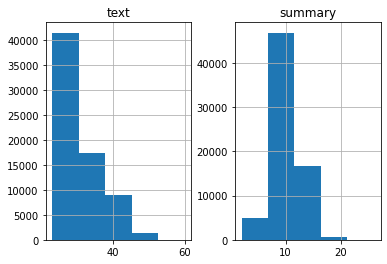

In [ ]:
pre['cleaned_text'] = pre['text']
pre['cleaned_summary'] = pre['summary']
text_count = []
summary_count = []
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [ ]:
cnt=0
for i in pre['cleaned_summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(pre['cleaned_summary']))

0.9789418877093518


In [ ]:
cnt=0
for i in pre['cleaned_text']:
    if(len(i.split())<=60):
        cnt=cnt+1
print(cnt/len(pre['cleaned_text']))

1.0


In [ ]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=100
max_summary_len=15

In [ ]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
raw = pd.read_csv('all_data.csv')

post_pre=pd.DataFrame({'text':raw['Text'],'summary':raw['Headline']})

In [ ]:
post_pre.head(2)

,text,summary
0,"Günlük burç yorumları ile aşk, para, aile ve s...",Günlük burç yorumları 2 Ocak 2020 Perşembe (Ha...
1,İstanbul Arnavutköy'de 4 katlı kumaş fabrikası...,Arnavutköy'de kumaş fabrikasının depo bölümünd...


In [ ]:
#Add sostok and eostok at 
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
post_pre=pd.read_csv('data.csv')
post_pre.head()
post_pre.dropna()
post_pre=post_pre.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

In [ ]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 70.3931233373543
Total Coverage of rare words: 6.710040600899804


In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 37062


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 80.88644656945466
Total Coverage of rare words: 13.038569641593098


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 13253


In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
x_tr[1]

array([ 2171,  3153,  5500, 17207,    25,  2484,  3177,  1689,   266,
          19,  9841,  1854, 18880, 32442, 12560,    65, 14207,   326,
          22,  2769,   452,    28, 15238,   259,  4772,  1037, 32443,
           5,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [ ]:
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
from keras import backend as K
import tensorflow as tf 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 37062
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     7412400     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
________________________________________________

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
#tf.test.is_built_with_cuda()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3070812579264035478
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14674281152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1626898278202328595
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('CIFAR10{epoch:02d}.h5',period=2,save_freq='epoch',save_weights_only=False)


In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=30,callbacks=[es,model_checkpoint],batch_size=256, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))



Epoch 1/30
238/238 [==============================] - 337s 1s/step - loss: 5.5306 - val_loss: 4.5892
Epoch 2/30
238/238 [==============================] - 321s 1s/step - loss: 4.5906 - val_loss: 4.2975
Epoch 3/30
238/238 [==============================] - 317s 1s/step - loss: 4.2594 - val_loss: 4.0448
Epoch 4/30
238/238 [==============================] - 313s 1s/step - loss: 3.9812 - val_loss: 3.8794
Epoch 5/30
238/238 [==============================] - 311s 1s/step - loss: 3.7599 - val_loss: 3.7368
Epoch 6/30
238/238 [==============================] - 307s 1s/step - loss: 3.5753 - val_loss: 3.6364
Epoch 7/30
238/238 [==============================] - 308s 1s/step - loss: 3.4123 - val_loss: 3.5631
Epoch 8/30
238/238 [==============================] - 306s 1s/step - loss: 3.2722 - val_loss: 3.5041
Epoch 9/30
238/238 [==============================] - 306s 1s/step - loss: 3.1515 - val_loss: 3.4618
Epoch 10/30
238/238 [==============================] - 306s 1s/step - loss: 3.0374 - val_lo

In [ ]:
model.save('my_model.h5')

In [ ]:
model.save('my_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('my_model.h5')



In [ ]:
results = model.evaluate(x_val, y_val, batch_size=128)
print("test loss, test acc:", results)

ValueError: ignored

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=1,callbacks=[es,model_checkpoint],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

692/692 [==============================] - 694s 992ms/step - loss: 3.2012 - val_loss: 3.4140


In [ ]:
new_model.save('mymodel.h5')

In [ ]:
new_model = tf.keras.models.load_model('mymodel.h5')


In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=3,callbacks=[es,model_checkpoint],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

NameError: ignored

In [ ]:
model.evaluate(x_tr,y_tr)

ValueError: ignored

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,100):
    print("Review:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,100)))
    #print("Predicted summary:",x_val[i].reshape(1,100))
    print("\n")

Review: milyonlarca memur ve memur emeklisinin maaşlarını artıracak 3600 ek gösterge için ak parti sözcüsü ömer çelik önemli açıklamalarda bulundu çelik personel sisteminde arası zamanlaması sayın bakan tarafından açıklanacak pozitif sürüyor dedi 
Original summary: ak parti sözcüsü ömer çelik'ten ek gösterge açıklaması pozitif sürüyor 
Predicted summary:  ak parti genel başkanı fahrettin altun'dan açıklama geldi


Review: 700 bin korsan noktalardan 2 tl ekstra ücret ödeyerek fatura ödediğini belirten ck boğaziçi elektrik genel müdürü halit bu da vatandaşın cebinden yılda 20 milyon tl'nin gittiğini gösteriyor dedi 
Original summary: korsan fatura ödeme merkezleri yılda 20 milyon tl'yi 
Predicted summary:  bin liralık burs 1 milyon lira


Review: meteoroloji genel müdürlüğü 5 aralık perşembe günü için 19 ile kuvvetli sağanak ve kar yağışı uyarısında bulundu bu nedenle vatandaşların ulaşımda aksamalar ve su baskını gibi olumsuzluklara karşı dikkatli ve tedbirli olunması istendi 
Original 

In [ ]:
model=tf.keras.models.load_model('my_model.h5')

In [ ]:
for i in range(0,100):
    print("Review:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,100)))
    #print("Predicted summary:",x_val[i].reshape(1,100))
    print("\n")

Review: pope francis on tuesday called for respect for each ethnic group in speech delivered in myanmar avoiding reference to the rohingya minority community as the nation works to restore peace the healing of wounds must be priority he said the pope myanmar visit comes amid the country military crackdown resulting in the rohingya refugee crisis 
Original summary: start pope avoids mention of rohingyas in key myanmar speech end 


KeyError: ignored

In [ ]:
def tokenize(array):
  seq2=[]
  seq=x_tokenizer.texts_to_sequences(array)
  seq2=pad_sequences(seq,  maxlen=max_text_len, padding='post') 
  return seq2
  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
abc=

Review: rize'de aşkına karşılık vermediği için savaş tarafından tabancayla sırtından vurulup boğazı kesilerek öldürülen gamze ablası tülay pala cumhurbaşkanı erdoğan ile görüştü erdoğan'la aralarında geçen konuşmayı anlatan pala cumhurbaşkanı gerekeni yapacağız arkada kalmasın dedi açıklamasında bulundu 
Original summary: gamze ablası cumhurbaşkanı ile yaptıkları konuşmayı anlattı cumhurbaşkanı gereken yapılacak kalmasın dedi 
Predicted summary:  emine bulut davasında sanık beraat etti


Review: derbide yaşanan robin van persie oğuzhan özyakup gerilimi i̇ngiliz basınında manşet oldu artık ilişkileri eskisi gibi olmayacak ifadeleri yer aldı 
Original summary: robin van persie oğuzhan özyakup gerilimi i̇ngiltere'de manşet oldu 
Predicted summary:  fenerbahçe ile anlaştı


Review: edirne'nin keşan ilçesinde haciz ve trafik cezası borçları gibi çeşitli nedenlerle yediemin otoparkında tutulan araç sayılarındaki artış nedeniyle yer sorunu yaşanıyor 
Original summary: yediemin doldu araçlar ü

Review: rize'de aşkına karşılık vermediği için savaş tarafından tabancayla sırtından vurulup boğazı kesilerek öldürülen gamze ablası tülay pala cumhurbaşkanı erdoğan ile görüştü erdoğan'la aralarında geçen konuşmayı anlatan pala cumhurbaşkanı gerekeni yapacağız arkada kalmasın dedi açıklamasında bulundu 
Original summary: gamze ablası cumhurbaşkanı ile yaptıkları konuşmayı anlattı cumhurbaşkanı gereken yapılacak kalmasın dedi 
Predicted summary:  emine bulut davasında sanık beraat etti


Review: derbide yaşanan robin van persie oğuzhan özyakup gerilimi i̇ngiliz basınında manşet oldu artık ilişkileri eskisi gibi olmayacak ifadeleri yer aldı 
Original summary: robin van persie oğuzhan özyakup gerilimi i̇ngiltere'de manşet oldu 
Predicted summary:  fenerbahçe ile anlaştı


Review: edirne'nin keşan ilçesinde haciz ve trafik cezası borçları gibi çeşitli nedenlerle yediemin otoparkında tutulan araç sayılarındaki artış nedeniyle yer sorunu yaşanıyor 
Original summary: yediemin doldu araçlar ü

In [ ]:
x=['The size of the Army is expected to be reduced by about 10,000 soldiers as part of a move towards robots, drones, and cyber warfareThe defence review is likely to see the loss of some tanks and aircraft - but the government said there would be "more ships, submarines and sailors".Numbers in the regular Army will be reduced to about 70,000 soldiers, having already fallen in recent years']
abc=tokenize(x)

Review: rize'de aşkına karşılık vermediği için savaş tarafından tabancayla sırtından vurulup boğazı kesilerek öldürülen gamze ablası tülay pala cumhurbaşkanı erdoğan ile görüştü erdoğan'la aralarında geçen konuşmayı anlatan pala cumhurbaşkanı gerekeni yapacağız arkada kalmasın dedi açıklamasında bulundu 
Original summary: gamze ablası cumhurbaşkanı ile yaptıkları konuşmayı anlattı cumhurbaşkanı gereken yapılacak kalmasın dedi 
Predicted summary:  emine bulut davasında sanık beraat etti


Review: derbide yaşanan robin van persie oğuzhan özyakup gerilimi i̇ngiliz basınında manşet oldu artık ilişkileri eskisi gibi olmayacak ifadeleri yer aldı 
Original summary: robin van persie oğuzhan özyakup gerilimi i̇ngiltere'de manşet oldu 
Predicted summary:  fenerbahçe ile anlaştı


Review: edirne'nin keşan ilçesinde haciz ve trafik cezası borçları gibi çeşitli nedenlerle yediemin otoparkında tutulan araç sayılarındaki artış nedeniyle yer sorunu yaşanıyor 
Original summary: yediemin doldu araçlar ü

In [ ]:
print(abc.reshape(1,100))

[[   1 2248    4    1  380   12  637    2   24 1762   14   51  135   68
  1393   20  187    4   50  481  628 3501 3707    5 2747  603 1916   12
  1323    2  571    1  795    4  220 7805    5  801   82    1   47    9
   111   79   24  121 5199 9933    5 8347 1763    3    1 3370  380   22
    24 1762    2   51 1024   68 1393  577  830 3759    3  593   71    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]


In [ ]:
x=["Hulusi Akar, Türkiye ve Yunanistan arasındaki Doğu Akdeniz gerilimi ile ilgili olarak kuvvet komutanları ve bölgedeki birlik komutanları ile toplantı yaptı. Akar, Doğu Akdeniz'de Türkiye ve KKTC'nin yer almadığı hiçbir projenin yaşama şansı olmadığını ve bölgede hiçbir oldu bittiye izin verilmeyeceğini belirtti. Gelişmeleri canlı anlatım sayfamızda aktardık."]
print(x[0])
print("Predicted summary:",decode_sequence(tokenize(x).reshape(1,100)))

Hulusi Akar, Türkiye ve Yunanistan arasındaki Doğu Akdeniz gerilimi ile ilgili olarak kuvvet komutanları ve bölgedeki birlik komutanları ile toplantı yaptı. Akar, Doğu Akdeniz'de Türkiye ve KKTC'nin yer almadığı hiçbir projenin yaşama şansı olmadığını ve bölgede hiçbir oldu bittiye izin verilmeyeceğini belirtti. Gelişmeleri canlı anlatım sayfamızda aktardık.
Predicted summary:  türkiye'den i̇dlib açıklaması çok fazla


In [ ]:
try

In [ ]:
catch

In [ ]:
class seq2seq:
  